In [1]:
# Module Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
# Constant Variables
NEXTSEQ_ENRICHMENT_PATH = "2023_09_08_Ru_enrich_fits.csv"

REFERENCE_DATA = pd.read_csv('in_vitro_data_summary.csv')

# Pairplots for replicates at other conditions
CONDITIONS_KEY = {
    'WT_only'                  : ['NP_11_64_2'],
    't0'                       : ['NP_11_64_9', 'NP_11_64_11', 'NP_11_64_12', 'NP_11_64_13', 'NP_11_64_15'],
    '0.04percent_CO2'          : ['NP_11_66_41'],
    '0.2percent_CO2'           : ['NP_11_66_1',  'NP_11_66_2',  'NP_11_66_3'],
    '0.3percent_CO2'           : ['NP_11_66_7',  'NP_11_66_8',  'NP_11_66_9'],
    '0.4percent_CO2'           : ['NP_11_66_4',  'NP_11_66_5',  'NP_11_66_6'],
    '1percent_CO2'             : ['NP_11_66_10', 'NP_11_66_11', 'NP_11_66_12'],
    '5percent_CO2_20uM_IPTG'   : ['NP_11_66_13', 'NP_11_66_14', 'NP_11_66_15',
                                  'NP_11_66_16', 'NP_11_66_17', 'NP_11_66_18',
                                  'NP_11_66_37', 'NP_11_66_38', 'NP_11_66_39'],
    '0uM_IPTG'                 : ['NP_11_66_19', 'NP_11_66_20', 'NP_11_66_21'],
    '5uM_IPTG'                 : ['NP_11_66_22', 'NP_11_66_23', 'NP_11_66_24'],
    '30uM_IPTG'                : ['NP_11_66_25', 'NP_11_66_26', 'NP_11_66_27'],
    '100uM_IPTG'               : ['NP_11_66_28', 'NP_11_66_29', 'NP_11_66_30'],
    '300uM_IPTG'               : ['NP_11_66_31', 'NP_11_66_32', 'NP_11_66_33'],
    '1000uM_IPTG'              : ['NP_11_66_34', 'NP_11_66_35', 'NP_11_66_36'],
    'Xylose'                   : ['NP_11_66_40']

}

# Reference AA sequence
AMINOACID_SEQ = 'MDQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFAAESSTGTNVEVCTTDDFTRGVDALVYEVDEARELTKIAYPVALFDRNITDGKAMIASFLTLTMGNNQGMGDVEYAKMHDFYVPEAYRALFDGPSVNISALWKVLGRPEVDGGLVVGTIIKPKLGLRPKPFAEACHAFWLGGDFIKNDEPQGNQPFAPLRDTIALVADAMRRAQDETGEAKLFSANITADDPFEIIARGEYVLETFGENASHVALLVDGYVAGAAAITTARRRFPDNFLHYHRAGHGAVTSPQSKRGYTAFVHCKMARLQGASGIHTGTMGFGKMEGESSDRAIAYMLTQDEAQGPFYRQSWGGMKACTPIISGGMNALRMPGFFENLGNANVILTAGGGAFGHIDGPVAGARSLRQAWQAWRDGVPVLDYAREHKELARAFESFPGDADQIYPGWRKALGVEDTRSALPA*'

In [3]:
# Functions
def corrfunc(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

In [4]:
# Create a custom colormap
color1 = '#FF0000'
color2 = '#FFFFFF'
color3 = '#0000FF'

nan_color = '#808080'  # Define the color for NaN values

# Set font and figure parameters
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["figure.figsize"] = (3, 3)

# Pandas column setting
pd.set_option('display.max_columns', None)

# Folder to place figures
output_figure_path = './'

In [5]:
# Load NextSeq Enrichment data
nextseq_enrichmend_df = pd.read_csv(NEXTSEQ_ENRICHMENT_PATH)
nextseq_enrichmend_df['Enrichment_mainCond'] = nextseq_enrichmend_df[['NP_11_66_13', 'NP_11_66_14', 'NP_11_66_15', 
                                  'NP_11_66_16', 'NP_11_66_17', 'NP_11_66_18',
                                  'NP_11_66_37', 'NP_11_66_38', 'NP_11_66_39']].mean(axis = 1)

print(nextseq_enrichmend_df.head())


  mutant  position WTresidue residue  NP_11_66_1  NP_11_66_2  NP_11_66_3   
0    Q3Y         3         Q       Y    0.061435   -0.002794   -0.064470  \
1    Q3C         3         Q       C    0.653414    0.559568    0.590622   
2    Q3D         3         Q       D    0.000000    0.124952    0.216148   
3    Q3E         3         Q       E    0.036287    0.087762    0.104458   
4    Q3F         3         Q       F    0.198206    0.498158    0.430593   

   NP_11_66_4  NP_11_66_5  NP_11_66_6  NP_11_66_7  NP_11_66_8  NP_11_66_9   
0    0.223302    0.086143    0.054593    0.086776    0.097160    0.015438  \
1    0.611095    0.595902    0.654018    0.531020    0.626783    0.648802   
2    0.278499    0.333185    0.260972    0.160405    0.241418    0.176835   
3    0.223302    0.210432    0.258519    0.107999    0.087094    0.176835   
4    0.518319    0.462620    0.458327    0.398020    0.460847    0.413635   

   NP_11_66_10  NP_11_66_11  NP_11_66_12  NP_11_66_13  NP_11_66_14   
0     0.17

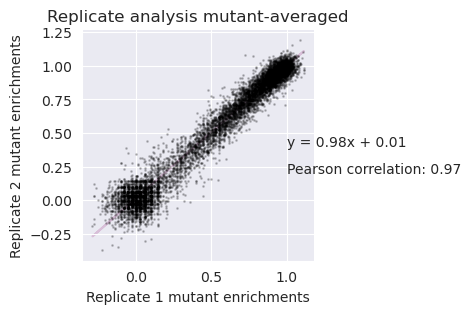

In [6]:
# Replicate correspondence
# # Set font for title
title_font = {'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold'}

# # Set font for labels
label_font = {'fontname': 'Arial', 'fontsize': 12}#, 'fontweight': 'bold'}

rep1 = 'NP_11_66_13'
rep2 = 'NP_11_66_14'

droppedNA = nextseq_enrichmend_df.dropna(subset = [rep1, rep2])
# sns.kdeplot(data=droppedNA, x=rep1, y=rep2, alpha=1, linewidths=1, color='lightsteelblue')

#find line of best fit
a, b = np.polyfit(droppedNA[rep1],
                  droppedNA[rep2], 1)

#add line of best fit to plot
plt.plot(droppedNA[rep1],
         a*droppedNA[rep1]+b,
         color = 'thistle', zorder = 0)

plt.scatter(nextseq_enrichmend_df[rep1], 
            nextseq_enrichmend_df[rep2],
            s = 1,
            alpha = 0.2,
            color = 'black')

plt.text(1, 0.4, 'y = ' + '{:.2f}'.format(a) + 'x + ' + '{:.2f}'.format(b))
plt.text(1, 0.2, 'Pearson correlation: ' + str(pearsonr(droppedNA[rep1], droppedNA[rep2])[0])[:4])

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.xlim(-1.5, 0.5)
# plt.ylim(-1.5, 0.5)
plt.title('Replicate analysis mutant-averaged')
plt.xlabel('Replicate 1 mutant enrichments')
plt.ylabel('Replicate 2 mutant enrichments')
plt.savefig(output_figure_path + 'replicateAnalysisByMutation.svg')
plt.show()

In [ ]:
# Enrichment pairplots

# Pairplots for replicates at main condition

pairplotData = nextseq_enrichmend_df[['NP_11_66_13', 'NP_11_66_14', 'NP_11_66_15', 
                                  'NP_11_66_16', 'NP_11_66_17', 'NP_11_66_18',
                                  'NP_11_66_37', 'NP_11_66_38', 'NP_11_66_39']].dropna()

g = sns.PairGrid(pairplotData,
#                  hue = , palette=["red"]
                )
g.map_upper(plt.scatter, color = 'black',
            s=1,
            alpha = 0.02)
g.map_diag(sns.histplot,
           color = 'lightgrey',
           kde=False,
           edgecolor='none')
g.map_lower(corrfunc)
g.map_lower(sns.kdeplot,
            cmap="mako_r")
g.fig.suptitle("5% CO2 replicates", y=1.01, size = 30)
g.fig.savefig('pairplotMainCondition.png')

In [ ]:
# Replicate correspondence average

pearsons = []

droppedNA = droppedNA.replace([np.inf, -np.inf], np.nan).dropna()

mainCondReps = ['NP_11_66_13', 'NP_11_66_14', 'NP_11_66_15', 
                'NP_11_66_16', 'NP_11_66_17', 'NP_11_66_18',
                'NP_11_66_37', 'NP_11_66_38', 'NP_11_66_39']

for i, rep1 in enumerate(mainCondReps):
    for j, rep2 in enumerate(mainCondReps):
        if rep1 != rep2:
            # Skip comparisons of technical replicates
            if (j-i) % 3 ==0:
                pass
            else:
                pearson = pearsonr(droppedNA[rep1], droppedNA[rep2])[0]
                pearsons.append(pearson)
    #         print('Pearson correlation between ' + rep1 + ' and ' + rep2 + ' = ' 
    #                  + str(pearsonr(droppedNA[rep1], droppedNA[rep2])[0])[:4])
np.mean(pearsons)

In [ ]:
# Technicals only just for fun

pearsons = []

droppedNA = droppedNA.replace([np.inf, -np.inf], np.nan).dropna()

mainCondReps = ['NP_11_66_13', 'NP_11_66_14', 'NP_11_66_15', 
                'NP_11_66_16', 'NP_11_66_17', 'NP_11_66_18',
                'NP_11_66_37', 'NP_11_66_38', 'NP_11_66_39']
for i, rep1 in enumerate(mainCondReps):
    for j, rep2 in enumerate(mainCondReps):
        if rep1 != rep2:
            # Only check technical reps
            if (j-i) % 3 ==0:
                pearson = pearsonr(droppedNA[rep1], droppedNA[rep2])[0]
                pearsons.append(pearson)
            else:
                pass
np.mean(pearsons)

In [ ]:
# Pairplots for other conditions

for condition in ['0.2percent_CO2', '0.3percent_CO2', '0.4percent_CO2', '1percent_CO2']:
    pairplotData = nextseq_enrichmend_df[CONDITIONS_KEY[condition]].dropna()

    g = sns.PairGrid(pairplotData,
    #                  hue = , palette=["red"]
                    )
    g.map_upper(plt.scatter, color = 'black',
                s=1,
                alpha = 0.02)
    g.map_diag(sns.histplot,
               color = 'lightgrey',
               kde=False,
               edgecolor='none')
    g.map_lower(corrfunc)
    g.map_lower(sns.kdeplot,
                cmap="mako_r")
    g.fig.suptitle(condition + "_replicates", y=1.05, size = 15)
    g.fig.savefig(condition + 'pairplot.png')
    g.fig.show()

In [ ]:
# Make the histogram for all mutants

mutsOnly = nextseq_enrichmend_df[nextseq_enrichmend_df['WTresidue'] != nextseq_enrichmend_df['residue']]
deadPositions = [191, 166, 329, 193, 194, 287]
mutsOnly['DeadOrAlive'] = mutsOnly['position'].apply(lambda x: 'Dead' if x in deadPositions else 'Alive')

# order = ['Dead', 'Alive']
custom_palette = {'Alive': 'lightgrey', 'Dead': 'red'}

sns.kdeplot(mutsOnly,
            x = 'Enrichment_mainCond',
            hue = 'DeadOrAlive',
            fill=True,
            linewidth=0,
            palette=custom_palette,
            alpha = 1,
#             hue_order = order,
            multiple="stack"
           )

plt.axvline(x=1, color='white', linestyle='--', linewidth=2, label = 'WT average')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label = 'Dead average')
plt.xlabel('Fitness', font = 'arial')
plt.ylabel('Density', font = 'arial')

plt.savefig(output_figure_path + 'Fig1FitnessHist.svg', format = 'svg')


In [ ]:
mutsOnly[mutsOnly['Enrichment_mainCond'] < 0.25]

In [ ]:
# Enrichments vs. kcats from literature
merged_enrichment_kcats_df = REFERENCE_DATA.merge(nextseq_enrichmend_df, how = 'outer', left_on = 'Mutation', right_on = 'mutant')
merged_enrichment_kcats_df = merged_enrichment_kcats_df[['Mutation', 'kcat_WTnorm', 'Error (fraction of fraction)',
                    'Enrichment at 20uM', 'Enrichment error']].dropna(subset = ['kcat_WTnorm',
                                                                      'Enrichment at 20uM']).fillna(0)

# merged_enrichment_kcats_df = merged_enrichment_kcats_df[merged_enrichment_kcats_df['Mutation'] != 'N111Q']

plt.errorbar(merged_enrichment_kcats_df['kcat_WTnorm'],
            merged_enrichment_kcats_df['Enrichment at 20uM'],
            xerr = merged_enrichment_kcats_df['Error (fraction of fraction)'],
            yerr = merged_enrichment_kcats_df['Enrichment error'],
            color = 'black',
             ecolor='gray', 
             capsize=3, 
            linestyle = None,
            fmt = 'o')

# Annotate each point with related text
# for i in range(len(merged_enrichment_kcats_df['Mutation'])):
#     plt.annotate(merged_enrichment_kcats_df.iloc[i]['Mutation'],  # Text to display
#                  (merged_enrichment_kcats_df.iloc[i]['kcat_WTnorm'],
#                   merged_enrichment_kcats_df.iloc[i]['Vmax_mean']),  # Point to annotate
#                  textcoords="offset points",  # How to position the text relative to the point
#                  xytext=(10, -10),  # Offset from the point (in points)
#                  ha='center',  # Horizontal alignment
#                  fontsize=8, fontname='Arial')  # Font size of the text
    
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)
plt.title('Literature $k_{cat}$s vs. Fitness', y = 1.1, fontname='Arial')
plt.xlabel('Literature $k_{cat}$s', fontname='Arial')
plt.ylabel('Fitness', fontname='Arial')
# plt.ylim(0,1.3)
# plt.xlim(0.8,1.0)
plt.savefig(output_figure_path + 'Literature_kcats.svg')
plt.show()

In [ ]:
# Total fitness heatmap

enrichMin = nextseq_enrichmend_df['Enrichment_mainCond'].min()
enrichMax = nextseq_enrichmend_df['Enrichment_mainCond'].max()

# Make heatmap

totalRange = enrichMax - enrichMin
rangeUpTo1 = 1 - enrichMin
Scaled1 = rangeUpTo1/totalRange

for position in np.arange(3,465):
    WTresVal = AMINOACID_SEQ[position - 1]
    mutVal = WTresVal + str(position) + WTresVal
    
    rowContents = [mutVal, position, WTresVal, WTresVal]
    for i in np.arange(0,41):
        rowContents.append(1)
    rowContents.append(0.15)
    rowContents.append(1)
    rowContents.append(0)
    rowContents.append(1)
    
    WTtempDF = pd.DataFrame([rowContents], columns=nextseq_enrichmend_df.keys())
    
    nextseq_enrichmend_df = pd.concat([WTtempDF, nextseq_enrichmend_df])
    
# Create the heatmap
pivotAA_Pos = nextseq_enrichmend_df.pivot_table(index = 'residue', columns = 'position', values = 'Enrichment_mainCond')
index_order = ['P', 'W', 'F', 'Y', 'I', 'L', 'M', 'V', 'A', 'G',
               'S', 'T', 'C', 'N', 'Q', 'D', 'E', 'K', 'R', 'H']
pivotAA_Pos = pivotAA_Pos.reindex(index_order[::-1])
fig, ax1 = plt.subplots(1, figsize=(92, 4), dpi=400)
cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', [(0, color1),
                                                                     (Scaled1, color2), (1, color3)], N=1024)

# Mask NaN values and assign them the 'nan_color'
pivotBCs_masked = np.ma.masked_invalid(pivotAA_Pos)

# Set the aspect ratio to 'auto' to prevent cutting off the edges
ax1.set_aspect('auto')

# Draw rectangles around NaN values (grey boxes)
for i in range(pivotBCs_masked.shape[0]):
    for j in range(pivotBCs_masked.shape[1]):
        if pivotBCs_masked.mask[i, j]:
            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=True, color=nan_color)
            ax1.add_patch(rect)

# Display the heatmap with the adjusted colormap
im = ax1.imshow(pivotBCs_masked, cmap=cmap)#, vmin=0, vmax=1)

# Invert the y-axis, not sure why this is necessary but it is
ax1.invert_yaxis()

# Remove the axis
ax1.axis('off')

# Save the heatmap without ticks or labels
plt.savefig(output_figure_path + 'heatmap_only021224.png', format='png', bbox_inches='tight', pad_inches=0)

# Create a separate figure for the colorbar
fig_colorbar, ax_colorbar = plt.subplots(figsize=(0.4, 2), dpi=200)

# Add the colorbar to the colorbar figure
cbar = plt.colorbar(im, cax=ax_colorbar, label="Fitness")

# Save the colorbar figure
plt.savefig(output_figure_path + 'colorbar021224.svg', format='svg', bbox_inches='tight', pad_inches=0)

plt.show()

In [ ]:
# Create the heatmap first inset
fig, ax1 = plt.subplots(1, figsize=(16, 8), dpi=100)

# Mask NaN values and assign them the 'nan_color'
pivotBCs_masked = np.ma.masked_invalid(pivotAA_Pos)
cmap.set_bad(nan_color)

# Draw rectangles around WT values
for i in np.arange(1,465):
    for j, AA in enumerate(index_order[::-1]):
        if AA == AMINOACID_SEQ[i+2]:
            rect = plt.Rectangle((i - 0.47, j - 0.47), 0.94, 0.94, fill=False, edgecolor='black', lw = 2)
            ax1.add_patch(rect)
        
ax1.imshow(pivotBCs_masked, cmap=cmap)
ax1.set_xlim(159.5, 192.503)
ax1.set_ylim(-0.5, 19.5)
ax1.axis('off')  # Turn off axis

# Save the heatmap without ticks or labels
plt.savefig(output_figure_path + 'heatmap_only_inset1_021524.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()


In [ ]:
# Create the heatmap second inset

fig, ax1 = plt.subplots(1, figsize=(16, 8), dpi=100)

# Mask NaN values and assign them the 'nan_color'
pivotBCs_masked = np.ma.masked_invalid(pivotAA_Pos)
cmap.set_bad(nan_color)

# Draw rectangles around WT values
for i in np.arange(1,465):
    for j, AA in enumerate(index_order[::-1]):
        if AA == AMINOACID_SEQ[i+2]:
            rect = plt.Rectangle((i - 0.47, j - 0.47), 0.94, 0.94, fill=False, edgecolor='black', lw = 2)
            ax1.add_patch(rect)
        
ax1.imshow(pivotBCs_masked, cmap=cmap)
ax1.set_xlim(314.5, 347.51)
ax1.set_ylim(-0.5, 19.5)
ax1.axis('off')  # Turn off axis

# Save the heatmap without ticks or labels
plt.savefig(output_figure_path + 'heatmap_only_inset2_021524.png', format='png', bbox_inches='tight', pad_inches=0)

plt.show()


In [ ]:
# Conservation track and average enrichment track
conservationFIIData = pd.read_csv('rubisco_cons_vs_tol_formII.csv')
conservationAllFormsData = pd.read_csv('rubisco_cons_vs_tol_jackhmmer.csv')
# Conservation for Form II
fig, ax1 = plt.subplots(1, figsize=(92, 4))#, dpi=400)
plt.plot(conservationFIIData['pos'],
        conservationFIIData['conservation'], ds = 'steps', linewidth = 4, color = 'black')
plt.xlim(0,466)
plt.title('Form II conservation', size = 50)
plt.savefig(output_figure_path + 'formIIConsTrack.svg')
plt.show()

# Conservation for all forms
fig, ax1 = plt.subplots(1, figsize=(92, 4))#, dpi=400)
plt.plot(conservationAllFormsData['pos'],
        conservationAllFormsData['conservation'], ds = 'steps', linewidth = 4, color = 'black')
plt.xlim(0,466)
plt.title('All forms conservation', size = 50)
plt.savefig(output_figure_path + 'allRubiscoConsTrack.svg')
plt.show()

# Calculate mutational tolerance - just mean enrichment by position

nextseq_enrichmend_dfNoWT = nextseq_enrichmend_df[nextseq_enrichmend_df['WTresidue'] != nextseq_enrichmend_df['residue']][['position', 'Enrichment_mainCond']]
average_tolerances = nextseq_enrichmend_dfNoWT.groupby('position')['Enrichment_mainCond'].mean().reset_index()

# Plot mutational tolerance
fig, ax1 = plt.subplots(1, figsize=(92, 4))#, dpi=400)
plt.plot(average_tolerances['position'],
        average_tolerances['Enrichment_mainCond'], ds = 'steps', linewidth = 4, color = 'lightgrey')
plt.xlim(0,466)
plt.title('Mutational tolerance (mean)', size = 50)
plt.savefig(output_figure_path + 'MutToleranceTrack.svg')
plt.show()


In [ ]:
# Create supp file of heatmap at each position:

for k in [0,1,2,3,4]:
    fig, ax1 = plt.subplots(1, figsize=(16, 8), dpi=100)

    # Mask NaN values and assign them the 'nan_color'
    pivotBCs_masked = np.ma.masked_invalid(pivotAA_Pos)
    cmap.set_bad(nan_color)

    # Draw rectangles around WT values
    for i in np.arange(0,465):
        for j, AA in enumerate(index_order[::-1]):
            if AA == AMINOACID_SEQ[i+2]:
                rect = plt.Rectangle((i - 0.47, j - 0.47), 0.94,
                                     0.94, fill=False, edgecolor='black', lw = 2)
                ax1.add_patch(rect)

    ax1.imshow(pivotBCs_masked, cmap=cmap)
    ax1.set_xlim((100*k - 0.5), (100*(k+1) - 0.49))
    ax1.set_ylim(-0.5, 19.5)
    ax1.axis('off')  # Turn off axis

    # Save the heatmap without ticks or labels
    plt.savefig(output_figure_path + 'Supp_Enrichment_heatmap_022124_part' + str(k) + '_.png',
                format='png', bbox_inches='tight', pad_inches=0)

    plt.show()

In [ ]:
# Make SI fig of aminoacid breakdown

noWT = nextseq_enrichmend_df[nextseq_enrichmend_df['WTresidue'] != nextseq_enrichmend_df['residue']]

# Make it more of a ridgeline
with plt.rc_context({'figure.figsize': (5, 20)}):
    sns.set(style="white", rc={
        "axes.facecolor": "white", "figure.facecolor": "white",
                               "axes.spines.left": False, "axes.spines.right": False,
                               "axes.spines.bottom": False, "axes.spines.top": False})
    plt.autoscale()
    colors = ['white', 'blue'] 

    sns.violinplot(y=noWT['residue'],
                   x=noWT['Enrichment_mainCond'],
                   palette=colors,
                   width=1.5,
                   hue=False,
                   hue_order=[False, True],
                   inner=None,
                   split=True,
                   linewidth=1,  # Set the linewidth to 0 to remove the violins' frames
                   order = ['P', 'W', 'F', 'Y', 'I', 'L', 'M', 'V', 'A', 'G',
               'S', 'T', 'C', 'N', 'Q', 'D', 'E', 'K', 'R', 'H'])  # Specify the desired order of violins
    plt.axvline(x=1, color='grey', linestyle='--', linewidth=2, label = 'WT average')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label = 'Dead average')
    plt.title('Average Amino Acid Enrichment 5% CO2 20uM IPTG')
    plt.legend([], [], frameon=False)
    plt.autoscale()
    plt.ylabel('Mutant amino acid')
    plt.savefig(output_figure_path + 'supp_ridgeline.svg')
    plt.show()
